In [0]:
# Ross Newman, Mica Haney

In [0]:
import pandas as pd
import numpy as np
import csv as csv
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [81]:
# read the data and display the first 5 rows
train_df = pd.read_csv('train_unt.csv', header=0)

print("\nNumber of samples:",train_df.shape[0],"and number of features:",train_df.shape[1],"\n")

train_df.head()


Number of samples: 9174 and number of features: 12 



,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# Understanding basic stats of the data set

In [82]:
# read about the data elsewhere, however, it is critical to observe the data to make sure
# everything is read in correctly and matches the description

train_df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000
mean,2.505559,0.031284,0.678875,1.414868,20.130401,23.578433,61.715064,12.737931,35.713647,154.868106,190.581753
std,1.116618,0.174094,0.466934,0.635363,7.940504,8.617957,19.401829,8.199027,49.667738,150.981155,181.011530
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,46.000000,7.001500,4.000000,35.000000,41.000000
50%,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,61.000000,11.001400,16.000000,117.000000,144.000000
75%,4.000000,0.000000,1.000000,2.000000,27.060000,31.060000,78.000000,16.997900,48.000000,222.000000,282.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,45.455000,100.000000,56.996900,362.000000,886.000000,977.000000


Text(0, 0.5, 'Count')

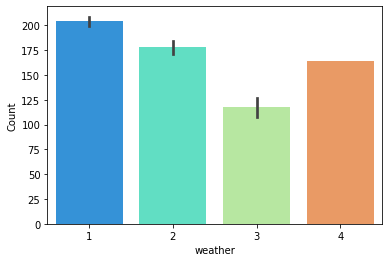

In [83]:
#Checking to see the impact of weather
sns.barplot('weather','count', data=train_df, palette="rainbow")
plt.xlabel("weather")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

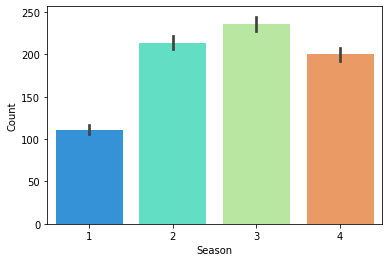

In [84]:
sns.barplot('season','count', data=train_df, palette="rainbow")
plt.xlabel("Season")
plt.ylabel("Count")

# Feature Engineering

In [0]:
# let's take datetime (which isn't very useful to algorithms) and turn it into something useful.
# e.g. this will create a new column for the hour
def hour_of_day(dt):
    return datetime.strptime(dt, "%Y-%m-%d %H:%M:%S").time().hour
train_df['hour'] = train_df['datetime'].map(hour_of_day)
train_df.head()
# note the new column on the right labelled "hour"
def year(dt):
    return (datetime.strptime(dt, "%Y-%m-%d %H:%M:%S").date().year - 2011) #normalize year
train_df['year'] = train_df['datetime'].map(year)
train_df.head()

train_df['day'] = pd.DatetimeIndex(train_df['datetime']).dayofweek
train_df.head()

def month(dt):
    return (datetime.strptime(dt, "%Y-%m-%d %H:%M:%S").date().month)
train_df['month'] = train_df['datetime'].map(month)
train_df.head()

train_df.drop('datetime',axis=1,inplace=True)
train_df.head()

# #using random forest, splitting up weather and seasons, https://towardsdatascience.com/understanding-feature-engineering-part-2-categorical-data-f54324193e63
season=pd.get_dummies(train_df['season'], prefix='season')
train_df=pd.concat([train_df,season], axis=1)
train_df.head()
weather=pd.get_dummies(train_df['weather'],prefix='weather')
train_df=pd.concat([train_df,weather],axis=1)
train_df.head()
train_df.drop(['season','weather'],inplace=True,axis=1)
train_df.head()

train_df["humidity"] = np.log1p(train_df["humidity"])
train_df["temp"] = np.log1p(train_df["temp"])

In [0]:
# Brakcet temperatures and atemps.
# def temp_bracket_create(col, num_brackets):
#     split_vals = []
#     col.sort()
#     step = (col[-1] - col [0]) / num_brackets
#     val = col[0] + step
#     while val < col[-1]:
#         split_vals.append(val)
#         val += step
#     return split_vals
# def temp_bracketer(temp, brackets):
#     for i, b in enumerate(brackets):
#       if temp < b:
#         return i
#     return len(brackets)
# brkts = temp_bracket_create(list(train_df['temp']), 8)
# train_df['temp_bracket'] = train_df['temp'].map(lambda x: temp_bracketer(x, brkts))
# train_df['temp_bracket'].head()
# temp_bracket=pd.get_dummies(train_df['temp_bracket'], prefix='temp_bracket')
# train_df=pd.concat([train_df,temp_bracket], axis=1)
# train_df.drop(['temp_bracket'],inplace=True,axis=1)
# train_df.head()

In [0]:
# def atemp_bracket_create(col, num_brackets):
#     split_vals = []
#     col.sort()
#     step = (col[-1] - col [0]) / num_brackets
#     val = col[0] + step
#     while val < col[-1]:
#         split_vals.append(val)
#         val += step
#     return split_vals
# def atemp_bracketer(temp, brackets):
#     for i, b in enumerate(brackets):
#       if temp < b:
#         return i
#     return len(brackets)
# abrkts = atemp_bracket_create(list(train_df['atemp']), 8)
# train_df['atemp_bracket'] = train_df['atemp'].map(lambda x: atemp_bracketer(x, abrkts))
# train_df['atemp_bracket'].head()
# atemp_bracket=pd.get_dummies(train_df['atemp_bracket'],prefix='atemp_bracket')
# train_df=pd.concat([train_df,atemp_bracket],axis=1)
# train_df.drop(['atemp_bracket'],inplace=True,axis=1)
# train_df.head()

In [88]:
def dewpoint(c, rh):
    return c - ((100 - rh) / 5)
train_df['dewpoint'] = [dewpoint(row['temp'], row['humidity']) for i, row in train_df.iterrows()]

def windchill(temp, wind):
    return 13.12 + 0.6215 * temp - 11.37 * (wind ** 0.16) + 0.3968 * temp * (wind ** 0.16)
train_df['windchill'] = [windchill(row['temp'], row['windspeed']) for i, row in train_df.iterrows()]

train_df.head()

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,hour,year,day,month,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,dewpoint,windchill
0,0,0,2.383243,14.395,4.406719,0.0,3,13,16,0,0,5,1,1,0,0,0,1,0,0,0,-16.735413,14.601186
1,0,0,2.304583,13.635,4.394449,0.0,8,32,40,1,0,5,1,1,0,0,0,1,0,0,0,-16.816527,14.552298
2,0,0,2.304583,13.635,4.394449,0.0,5,27,32,2,0,5,1,1,0,0,0,1,0,0,0,-16.816527,14.552298
3,0,0,2.383243,14.395,4.330733,0.0,3,10,13,3,0,5,1,1,0,0,0,1,0,0,0,-16.750610,14.601186
4,0,0,2.383243,14.395,4.330733,0.0,0,1,1,4,0,5,1,1,0,0,0,1,0,0,0,-16.750610,14.601186


# Make visualizations to better understand your data

hours: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


Text(0.5, 1.0, 'Measured bike use over 2 years')

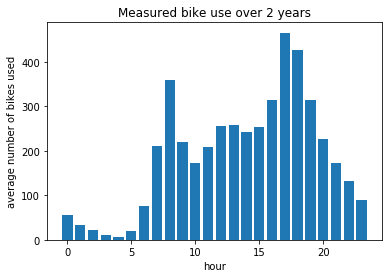

In [89]:
# now let's take a look at the amerage amount of bike use for each hour of the day
# as a "sanity check" to make sure the data makes sense before going further
hours = np.unique(train_df['hour'])
print("hours:",hours)

hours_mean = {}
for h in hours:
    temp_df = train_df.loc[train_df['hour'] == h]
    hours_mean[h] = temp_df['count'].mean()

# plot the results. Maybe should see peaks from bike commuting or evening use
plt.bar(hours,[hours_mean[h] for h in hours])
plt.xlabel("hour")
plt.ylabel("average number of bikes used")
plt.title("Measured bike use over 2 years")

temps: [0.5988365  0.97077892 1.24126859 1.45395301 1.62924054 1.77833645
 1.90805992 2.02287119 2.12584791 2.21920348 2.3045831  2.383243
 2.45616418 2.52412736 2.58776404 2.64759223 2.70404218 2.75747508
 2.80819715 2.85647021 2.90251989 2.94654203 2.98870766 3.02916705
 3.06805294 3.10548314 3.14156272 3.17638577 3.21003688 3.24259235
 3.2741213  3.30468648 3.33434507 3.36314931 3.39114705 3.41838221
 3.44489524 3.47072344 3.49590132 3.5204608  3.54443155 3.56784113
 3.59071521 3.61307774 3.63495111 3.65635626 3.67731282 3.6978392
 3.73766962]


Text(0.5, 1.0, 'Measured bike use over 2 years')

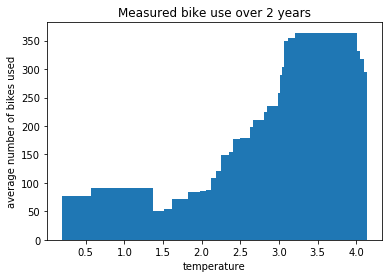

In [90]:

temps = np.unique(train_df['temp'])
print("temps:",temps)

temps_mean = {}
for t in temps:
    temp_df = train_df.loc[train_df['temp'] == t]
    temps_mean[t] = temp_df['count'].mean()

# plot the results. 
plt.bar(temps,[temps_mean[t] for t in temps])
plt.xlabel("temperature")
plt.ylabel("average number of bikes used")
plt.title("Measured bike use over 2 years")

atemps: [ 0.76   1.515  2.275  3.03   3.79   4.545  5.305  6.06   6.82   7.575
  8.335  9.09   9.85  10.605 11.365 12.12  12.88  13.635 14.395 15.15
 15.91  16.665 17.425 18.18  18.94  19.695 20.455 21.21  21.97  22.725
 23.485 24.24  25.    25.76  26.515 27.275 28.03  28.79  29.545 30.305
 31.06  31.82  32.575 33.335 34.09  34.85  35.605 36.365 37.12  37.88
 38.635 39.395 40.15  40.91  41.665 42.425 43.18  43.94  44.695 45.455]


Text(0.5, 1.0, 'Measured bike use over 2 years')

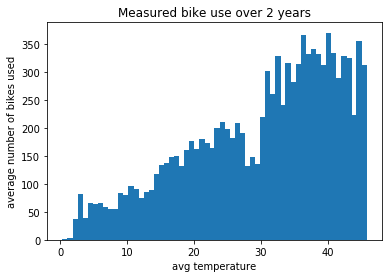

In [91]:
#checking to see if there's any significant difference in average temps vs temp
atemps = np.unique(train_df['atemp'])
print("atemps:",atemps)

atemps_mean = {}
for t in atemps:
    temp_df = train_df.loc[train_df['atemp'] == t]
    atemps_mean[t] = temp_df['count'].mean()

# plot the results. Maybe should see peaks from bike commuting or evening use
plt.bar(atemps,[atemps_mean[t] for t in atemps])
plt.xlabel("avg temperature")
plt.ylabel("average number of bikes used")
plt.title("Measured bike use over 2 years")

Text(0, 0.5, 'Count')

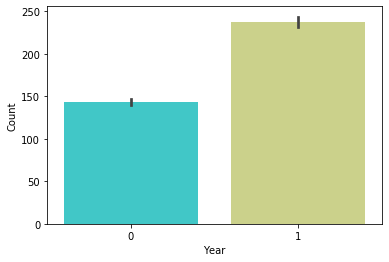

In [94]:
#checking to see if there is a significant difference in the year 
sns.barplot('year','count', data=train_df, palette="rainbow")
plt.xlabel("Year")
plt.ylabel("Count")

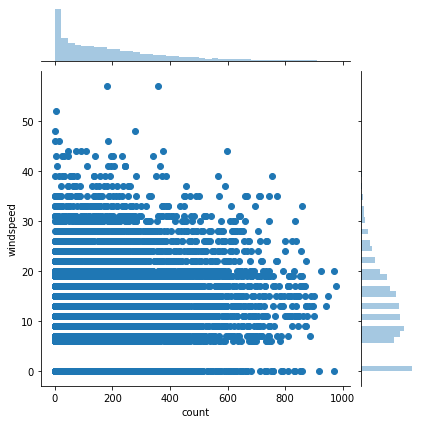

In [95]:
#Visualize effect of windspeed on count
sns.jointplot("count","windspeed", data=train_df)
#visualization reveals that the windspeed seems to be discrete rather continuous, which I was not expecting, might be better to separate into ranges.
# Why so many 0?

In [96]:
# Testing out imputation for 0 values. https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4

from sklearn.ensemble import RandomForestClassifier

weatherColumns = ["temp","humidity","month","weather_1","weather_2","weather_3","weather_4","season_1","season_2","season_3","season_4"]
no_wind = train_df[train_df["windspeed"]==0]
wind = train_df[train_df["windspeed"]!=0]
wind["windspeed"] = wind["windspeed"].astype("str")


wind_model = RandomForestClassifier(n_estimators=500)
wind_model.fit(wind[weatherColumns], wind["windspeed"])
predicted_wind = wind_model.predict(X = no_wind[weatherColumns])

no_wind["windspeed"] = predicted_wind
train_df = wind.append(no_wind)
train_df["windspeed"] = np.log1p(train_df["windspeed"].astype("float"))

train_df.reset_index(inplace=True)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


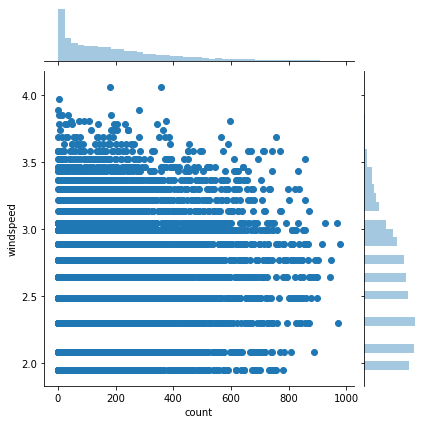

In [97]:
#Visualize effect of windspeed on count with new 0 values
sns.jointplot("count","windspeed", data=train_df)


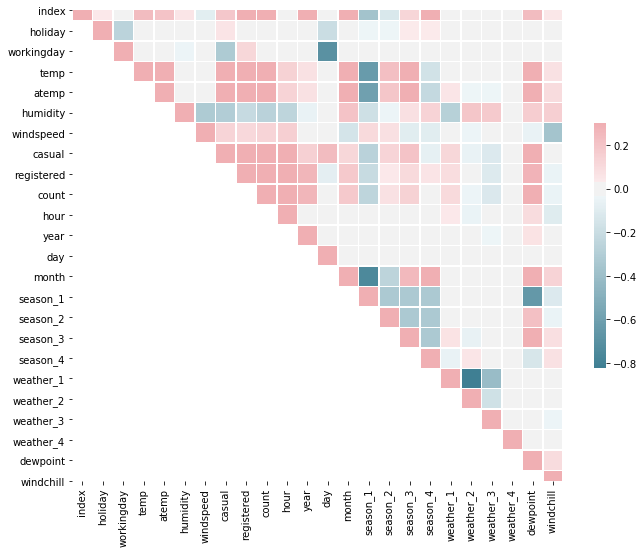

In [98]:
# Get correlation matrix to find important features
correlation_matrix = train_df[:].corr() # https://seaborn.pydata.org/examples/many_pairwise_correlations.html
mask = np.array(correlation_matrix)
mask[np.triu_indices_from(mask)] = False
f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(correlation_matrix, mask=mask, cmap=sns.diverging_palette(220, 10, as_cmap=True), vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Pick the features and the model

In [101]:
# pick your features
cols = ['holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'hour', 'year', 'day','month', 'season_1', 'season_2', 'season_3', 'season_4', 'weather_1', 'weather_2', 'weather_3', 'weather_4', 'dewpoint', 'windchill']
# cols = ['hour','holiday', 'workingday', 'weather_1','weather_2','weather_3','weather_4','season_1','season_2','season_3','season_4','temp_bracket_0', 'temp_bracket_1', 'temp_bracket_2', 'temp_bracket_3', 'humidity','windspeed','year','month','day']
# cols = ['hour','holiday', 'workingday', 'weather_1','weather_2','weather_3','weather_4','season_1','season_2','season_3','season_4','temp','humidity','windspeed','year','month','day'] # clearly a simple model
#  cols = ['hour','holiday', 'workingday', 'weather','season','temp','atemp','humidity','windspeed','year','month','day'] # clearly a simple model
# try more features later, like...
# cols = ['hour','season']

# pick your model (you should consider adjusting optional parameters too)
# reading in a few models we can pick from (there are many others)
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.linear_model import LinearRegression
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

#X_test/y_test are the validation set
model = RandomForestRegressor(n_estimators=500, max_features='auto', min_samples_split=3, max_depth=50)
X_train, X_test, y_train, y_test = train_test_split(train_df[cols], train_df['count'], test_size=0.20, random_state=42)
model.fit(X = X_train, y=  y_train)
pred_count = model.predict(X_test[cols])

# pick one by commenting/uncommenting
# model = DecisionTreeRegressor()
# model = LinearRegression()
# model = KNeighborsRegressor(n_neighbors = 5)
# model = svm.LinearSVR()


# model = SVR(gamma='auto',kernel="poly")
# model = RandomForestRegressor(n_estimators = 1)

from sklearn.metrics import mean_squared_error
rms = np.sqrt(mean_squared_error(y_test,pred_count))
print("RMS: " + str(rms))


RMS: 42.03886561032454


In [0]:
# import tensorflow as tf
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Flatten(input_shape=(28, 28)),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(10, activation='softmax')
#     ])
# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])
# model.fit(x_train, y_train, epochs=5)
# model.evaluate(x_test,  y_test, verbose=2)

# rms = np.sqrt(mean_squared_error(y_test,pred_count))
# print("RMS: " + str(rms))

In [103]:
#google "Best Boosting sklearn"
from sklearn.ensemble import GradientBoostingRegressor
boost_model = GradientBoostingRegressor(n_estimators=1000, min_samples_leaf=6)

boost_model.fit(X=X_train, y=np.log1p(y_train))

pred_count = boost_model.predict(X_test[cols])
rms = np.sqrt(mean_squared_error(y_test, np.expm1(pred_count)))
print("RMS: " + str(rms))


RMS: 41.300059455853855


In [104]:

from sklearn.ensemble import AdaBoostRegressor
ada_boost_model = AdaBoostRegressor(n_estimators=50, loss='exponential')

ada_boost_model.fit(X=X_train, y=y_train)

pred_count = ada_boost_model.predict(X_test[cols])
rms = np.sqrt(mean_squared_error(y_test, pred_count))
print("RMS: " + str(rms))

#have not submitted a AdaBoost yet

RMS: 105.42572065219463


# Set up Grid Search and cross-validation

In [0]:


# # Randomforest hyperparameter tuning: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
max_depth = [5, 8, 15, 25, 30]

grid_params = {'n_estimators': [100,200, 400], 'max_features': ['auto'], 'max_depth': max_depth, 'min_samples_split': [2, 5, 10, 15, 30]}
from sklearn.model_selection import GridSearchCV

grid_model = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid_params, cv=3,scoring='neg_mean_squared_error')


# Grid Search, cross-validate and find the best hyperparameters

In [106]:
# # fit the model to the training subset of original training data
grid_model.fit(X_train, y_train)

# predict on the testing subset of the original training data
grid_results  = {"best_score": grid_model.best_score_,
                                 "best_params": grid_model.best_params_,
                                 "best_estimator": grid_model.best_estimator_,
                                 "final_test_accuracy": 0}
grid_model = grid_results['best_estimator']


print("RMS error: ", np.sqrt(-1*grid_results['best_score']))

RMS error:  44.2611680126691


In [107]:
pred_count = grid_model.predict(X_test[cols])
rms = np.sqrt(mean_squared_error(y_test,pred_count))
print("RMS: " + str(rms))

RMS: 42.034866516963554


# Creating the test file output

In [108]:
# read in the test data
test_df = pd.read_csv('test_unt.csv', header=0)
print("\nNumber of samples:",test_df.shape[0] ,"and number of features:",test_df.shape[1],"\n")
test_df['hour'] = test_df['datetime'].map(hour_of_day)
test_df['year'] = test_df['datetime'].map(year)


test_df['day'] = pd.DatetimeIndex(test_df['datetime']).dayofweek
test_df['month'] = test_df['datetime'].map(month)

#using random forest, splitting up weather and seasons, https://towardsdatascience.com/understanding-feature-engineering-part-2-categorical-data-f54324193e63
season=pd.get_dummies(test_df['season'], prefix='season')
test_df=pd.concat([test_df,season], axis=1)
weather=pd.get_dummies(test_df['weather'],prefix='weather')

def add_missing_dummy_columns( d, columns ):
    missing_cols = set( columns ) - set( d.columns )
    for c in missing_cols:
        d[c] = 0

add_missing_dummy_columns(weather, {"weather_1","weather_2","weather_3","weather_4"})
test_df=pd.concat([test_df,weather],axis=1)
test_df.drop(['season','weather'],inplace=True,axis=1)

# show the test data output to be sure it read in correctly and added the column

test_df["windspeed"] = np.log1p(test_df["windspeed"].astype("float"))
test_df["humidity"] = np.log1p(test_df["humidity"])
test_df["temp"] = np.log1p(test_df["temp"])
test_df.head()


Number of samples: 1712 and number of features: 9 



,datetime,holiday,workingday,temp,atemp,humidity,windspeed,hour,year,day,month,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-17 00:00:00,1,0,2.219203,9.850,3.871201,2.772670,0,0,0,1,1,0,0,0,0,1,0,0
1,2011-01-17 01:00:00,1,0,2.219203,9.850,3.806662,2.638914,1,0,0,1,1,0,0,0,0,1,0,0
2,2011-01-17 02:00:00,1,0,2.125848,8.335,3.784190,2.890255,2,0,0,1,1,0,0,0,0,1,0,0
3,2011-01-17 03:00:00,1,0,2.125848,9.090,3.784190,2.638914,3,0,0,1,1,0,0,0,0,1,0,0
4,2011-01-17 04:00:00,1,0,2.125848,9.850,3.784190,2.302395,4,0,0,1,1,0,0,0,0,1,0,0


In [0]:

# fit the selected model TO YOUR FULL TRAINING SET
boost_model.fit(train_df[cols], np.log1p(train_df['count']))

# apply to the test data FOR WHICH YOU DON'T HAVE THE ANSWERS
# (not the "test set" you used for model selection and tuning)
pred_count = np.expm1(boost_model.predict(test_df[cols]))

# add the prediction column (in case you want to inspect it later)
test_df['count'] = pred_count



# save the predicted count as a csv with a header column and datetime row
test_df = test_df[['datetime','count']].to_csv('my_prediction.csv', 
    index=False, header=True)
print("Prediction complete. Saved as my_prediction.csv")